# Python Assignment
## Katerina Holan
## EEOB 546X
### 3/31/2017

In [2]:
#make sure biopython is installed

In [3]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

### 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook

In [4]:
def get_sequences_from_file(fasta_fn):                        #defines a new function called get_sequences_from_file with input file fasta_fn
    sequence_data_dict = {}                                   #creates a new, empty dictionary called sequence_data_dict
    for record in SeqIO.parse(fasta_fn, "fasta"):             #for every record in your file fasta_fn, the biopython function SeqIO.parse will find the sequences in the file 
        description = record.description.split()              #
        species_name = description[1] + " " + description[2]  #pulls the species name from the fasta file
        sequence_data_dict[species_name] = record.seq         #assigns the sequence (value) to its species name (key) in the dictionary
    return(sequence_data_dict)                                #returns your finished dictionary of species name and sequence

### 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion

In [5]:
def translate_function(string_nucleotides):                                          #define new function to translate a string of nucleotides
     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]     #codon table from DNA
     aa_seq_string = ""                                                              #create variable to hold new amino acid sequence 
     for i in range(0, len(string_nucleotides), 3):                                  #takes every thrird variable after 1st variable (eg, 1st, 4th, 7th, etc) until the end of your string
         codon=string_nucleotides[i]+string_nucleotides[i+1]+string_nucleotides[i+2] #define codon as each set of 3 nucleotides
         if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":    #if the codon is a stop codon, this will stop the function before that stop codon
                break
         else:                                                                       #if it isn't a stop codon, the new amino acid will be added to the end of your aa_seq_string variable
                aa_seq_string += mito_table.forward_table[codon]
     return(aa_seq_string)                                                           #function will return finished amino acid sequence

In [7]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [8]:
#test sequence.  Has stop codon AGG at +16
seq = 'GACTTAATGGGCAATAGGCAAGCACTTGAAAAAGATGCCAACGACATGAAAACACAAGACAA'
translate_function(seq)

'DLMGN'

### 3. Write an alternative translation function

In [22]:
#these are from the biopython package.  they are used with the translate function
from Bio.Seq import Seq         
from Bio.Alphabet import IUPAC

In [35]:
#practice with the .translate() function
coding_dna = Seq("GACTTAATGGGCAATAGGCAAGCACTTGAAAAAGATGCCAACGACATGAAAACACAAGACAA", IUPAC.unambiguous_dna)
coding_dna.translate()

#translated sequence ignores stop codon and continues with the translation

C:\ProgramData\Anaconda3\lib\site-packages\Bio\Seq.py:2071: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Seq('DLMGNRQALEKDANDMKTQD', IUPACProtein())

In [54]:
def my_translate(string_nucleotides):                                                  #define new fuction that takes a string of nucleotides
    seq = Seq(string_nucleotides, IUPAC.unambiguous_dna)                               #assign 'seq' as the sequence from string_nucleotides that is IUPAC unambiguous dna
    aa_seq_string = seq.translate(table = "Vertebrate Mitochondrial", to_stop = True)  #assign result of the translate function to aa_seq_string.  the arguments tell the function to us the vertebrate mitochondrial codon table and to stop at the first stop codon it sees
    print(aa_seq_string)                                                               #print final amino acid sequence

In [55]:
#testing my_translate() function. gives amino acid sequence identical to the one in part one
seq = 'GACTTAATGGGCAATAGGCAAGCACTTGAAAAAGATGCCAACGACATGAAAACACAAGACAA'
my_translate(seq)

#gives an error that the sequence is not a multiple of three.  
#this should not matter since our sequences will stop at stop codons, not when it reaches the end of the sequence.

DLMGN


C:\ProgramData\Anaconda3\lib\site-packages\Bio\Seq.py:2071: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


### 4. Write a function (or 3 functions) that calculates the proportion of each of 3 amino acid categories in a sequence

In [63]:
#testing sequence from maizegdb.org
#this is the amino acid sequence for the maize gene glossy15, which is involved in juvenile to adult transition
gl15 = 'MAATRRAFFHSAVDGIARAGPGEAELLPAPPQVGRPVEGASSMVFGFPVPRPTMPDSRPAAVTQQFFPPTTTAAQQATMEEQCHVPAGSAAEQWVRSSASRKSRRGPRSRSSQYRGVTFYRRTGRWESHIWDCGKQVYLGGFDTAQAAARAYDQAAIKFRGLNADINFTLDDYKDEMKKMKDLSKEEFVLVLRRQGAGFVRGSSRFRGVTQHKCGKWEARIGQLMGKKYVYLGLYDTETEAAQHANQGI'

In [279]:
def number_charged_aa_function(aa_seq_string):     #define function
    charged = ['K','R','D','E']                    #create list of charged amino acids
    total_charged_aa = 0                           #set total_charged_aa equal to zero to start
    for aa in charged:                             #for loop to count number of amino acids
        count = aa_seq_string.count(aa)            #count each type of amino acid
        total_charged_aa += count                  #add the counts to total_charged_aa to get total number of charged amino acids
    return total_charged_aa                        #return total count of charged amino acid

def number_polar_aa_function(aa_seq_string):       #to avoid confusion in the output, I created separate functions for polar and hydrophobic amino acids
    polar = ['Q','N','H','S','T','Y','C','M','W']
    total_polar_aa = 0
    for aa in polar:
        count = aa_seq_string.count(aa)
        total_polar_aa += count
    return total_polar_aa

    
def number_hydrophobic_aa_function(aa_seq_string):
    hydrophobic = ['A','I','L','F','V','P','G']
    total_hydrophobic_aa = 0
    for aa in hydrophobic:
        count = aa_seq_string.count(aa)
        total_hydrophobic_aa += count
    return total_hydrophobic_aa

#### Testing my functions with glossy15

In [280]:
number_charged_aa_function(gl15)

60

In [281]:
number_polar_aa_function(gl15)

76

In [282]:
number_hydrophobic_aa_function(gl15)

113

## Main

In [283]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bear_df = pd.read_csv("bears_data.csv")
species_list = list(bear_df.species)

In [284]:
cytb_seqs
cytb_seqs['Ailuropoda melanoleuca']

Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet())

In [285]:
bear_df

,species,mass,charged,polar,hydrophobic
0,Ursus spelaeus,550.800,NaN,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN,NaN


### 5. In the MAIN part of the script, call your functions from 3 (or 2) and 4 and complete the empty columns in the dataframe

In [316]:
#practice run
ail_translate = translate_function(cytb_seqs['Ailuropoda melanoleuca'])
ail_translate

'MINIRKTHPLVKIINNSFIDLPTPSNISTWWNFGSLLGVCLILQILTGLFLAMHYTSDTATAFSSVAHICRDVNYGWFIRYMHANGASMFFICLFMHVGRGLYYGSYLFPETWNIGIILLLTIMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTNLVEWIWGGFSVDKATLTRFFAFHFILPFIISALAMVHLLFLHETGSNNPSGIPSDPDKIPFYPYHTIKDILGVLFLVLALMTLALFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILTIIPLLHTSKQRSMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPITSIIENSLSKW'

In [287]:
ail_charged = number_charged_aa_function(ail_translate)
ail_charged

34

In [288]:
ail_polar = number_polar_aa_function(ail_translate)
ail_polar

130

In [289]:
ail_hydrophobic = number_hydrophobic_aa_function(ail_translate)
ail_hydrophobic

215

In [315]:
i = 0                                                                          #used to iterate through the rows
for value in cytb_seqs.values():                                               #pulls values from your seqs dictionary, aka the species names
    translation = translate_function(value)                                    #translate seqs
    bear_df.loc[i,'charged'] = number_charged_aa_function(translation)         #count number of charged aas
    bear_df.loc[i,'polar'] = number_polar_aa_function(translation)             #count number of polar aas
    bear_df.loc[i,'hydrophobic'] = number_hydrophobic_aa_function(translation) #count number of hydrophobic aas
    i = i + 1                                                                  #add one to i so that next time thorugh for loop will look at the next row
bear_df                                                                        #view final filled-in dataframe

,species,mass,charged,polar,hydrophobic
0,Ursus spelaeus,550.800,35.0,125.0,219.0
1,Ursus arctos,203.500,35.0,123.0,221.0
2,Ursus thibetanus,99.714,35.0,124.0,220.0
3,Melursus ursinus,100.030,34.0,129.0,216.0
4,Ursus americanus,110.560,34.0,128.0,217.0
5,Helarctos malayanus,47.020,35.0,129.0,215.0
6,Ailuropoda melanoleuca,118.200,34.0,130.0,215.0
7,Tremarctos ornatus,140.700,34.0,127.0,218.0
8,Ursus maritimus,425.100,35.0,124.0,220.0


### 6. Plot a bar-chart of adult mass per species

In [319]:
%matplotlib inline
from ggplot import *

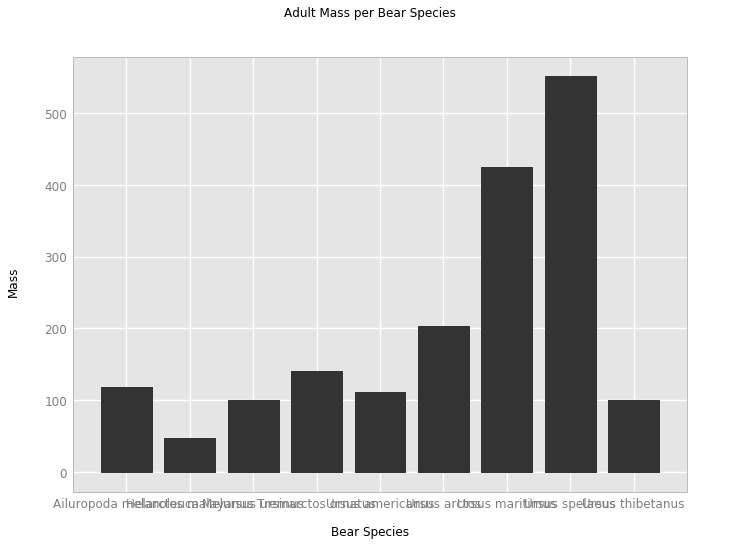

<ggplot: (16733416)>

In [348]:
ggplot(aesthetics= aes(x = 'species', weight = 'mass'), data = bear_df) + \
geom_bar() + \
theme(title = 'Adult Mass per Bear Species', axis_title_y = 'Mass', axis_title_x = 'Bear Species') 
#when I tilt the labels, they convert to their underlying numbers, so I have left them as is.  
#The graph has arranged the species in alphabetical order

### Ursus spelaeus is the largest species in this dataset.  After a quick Google search that led me to Wikipedia (https://en.wikipedia.org/wiki/Cave_bear), I found out that this bear's common name is the cave bear, and that it is a very large, extinct species of bear that lived in Europe and Asia.  It's interesting that the mass can be estimated given the fact that this species has been extinct for 24,000 years.

### 7. Plot a graph that shows the amino-acid type proportions

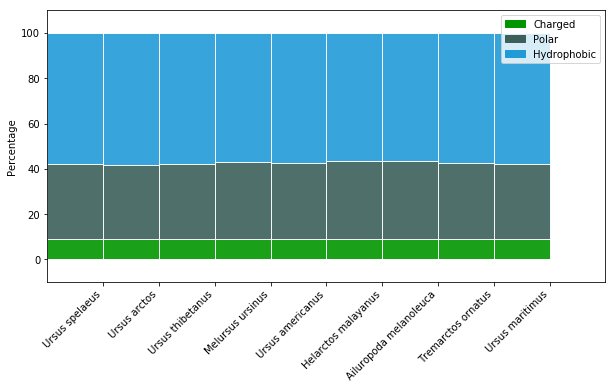

In [360]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


#the following code was modified from <https://chrisalbon.com/python/matplotlib_percentage_stacked_bar_plot.html>


f, ax = plt.subplots(1, figsize=(10,5))
bar_width = 1
bar_l = [i for i in range(len(bear_df['charged']))]
tick_pos = [i+(bar_width/2) for i in bar_l]
totals = [i+j+k for i,j,k in zip(bear_df['charged'], bear_df['polar'], bear_df['hydrophobic'])]
pre_rel = [i / j * 100 for  i,j in zip(bear_df['charged'], totals)]
mid_rel = [i / j * 100 for  i,j in zip(bear_df['polar'], totals)]
post_rel = [i / j * 100 for  i,j in zip(bear_df['hydrophobic'], totals)]
ax.bar(bar_l,
       pre_rel,
       label='Charged',
       alpha=0.9,
       color='#019600',
       width=bar_width,
       edgecolor='white'
       )
ax.bar(bar_l,
       mid_rel,
       bottom=pre_rel,
       label='Polar',
       alpha=0.9,
       color='#3C5F5A',
       width=bar_width,
       edgecolor='white'
       )
ax.bar(bar_l,
       post_rel,
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)],
       label='Hydrophobic',
       alpha=0.9,
       color='#219AD8',
       width=bar_width,
       edgecolor='white'
       )
plt.xticks(tick_pos, bear_df['species'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

#the following code was modified from <http://matplotlib.org/users/legend_guide.html>

charged = mpatches.Patch(color='#019600', label='Charged')
polar = mpatches.Patch(color='#3C5F5A', label='Polar')
hydrophobic = mpatches.Patch(color='#219AD8', label='Hydrophobic')

plt.legend(handles=[charged, polar, hydrophobic])


plt.show()







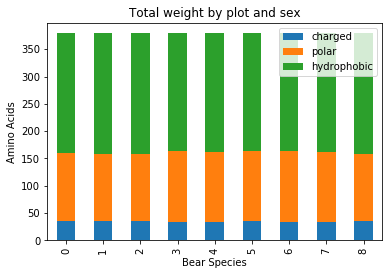

In [355]:
#an alternative plot that is stacked as opposed to proportions
bear_aa = bear_df.drop('mass', axis = 1)
s_plot = bear_aa.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
s_plot.set_ylabel("Amino Acids")
s_plot.set_xlabel("Bear Species")

### The cytochrome-b for these bear species seem to have extremely similar proportions of the three types of amino acids (charged, polar, and hydrophobic).  This is likely because this gene is very important to survival and therefore is highly conserved.  It is interesting that even Ursus spelaeus, the extinct bear, also has similar proportions of amino acids, which also helps support the hypothese that this gene is highly conserved.

### 8. Write the entire dataframe to a new CSV file

In [357]:
bear_df.to_csv('bears_mass_cytb.csv')